In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
G.add_nodes_from([

    (4, {"color": "red"}),

    (5, {"color": "green"}),

])

In [6]:
H = nx.path_graph(10)

In [7]:
G.add_nodes_from(H)

In [8]:
import matplotlib.pyplot as plt

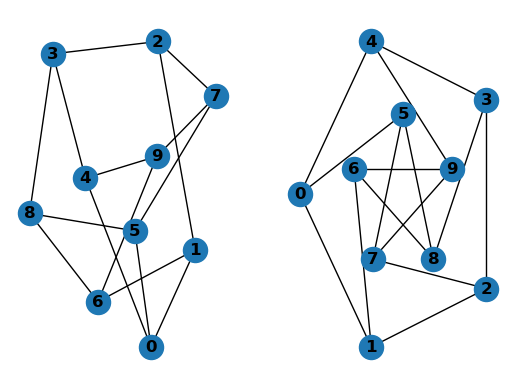

In [9]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

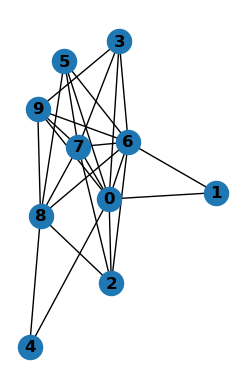

In [10]:
ba = nx.barabasi_albert_graph(10, 5)
subax3 = plt.subplot(121)
nx.draw(ba, with_labels=True, font_weight='bold')

In [11]:
nx.cycle_basis(ba)

[[3, 9, 0],
 [6, 9, 0],
 [7, 9, 0],
 [2, 8, 9, 0],
 [4, 8, 9, 0],
 [5, 8, 9, 0],
 [6, 8, 9],
 [7, 8, 9],
 [2, 7, 0],
 [3, 7, 0],
 [5, 7, 0],
 [6, 7, 0],
 [1, 6, 0],
 [2, 6, 0],
 [3, 6, 0],
 [5, 6, 0]]

max_clieques  [[1, 10, 2, 11]]
cycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0], [1, 11, 2], [10, 11, 2], [1, 10, 2]]
reduced_clycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0]]


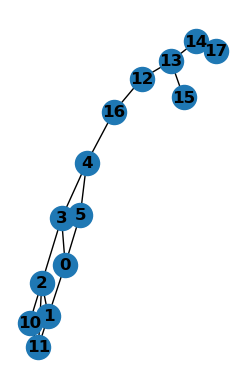

In [12]:
G = nx.Graph()

nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [0, 3, 4, 5])
# add clique
G.add_node(10)
G.add_edges_from([(1, 10), (2, 10)])
# add high order clique
G.add_node(11)
G.add_edges_from([(1, 11), (2, 11), (11, 10)])
# add line path
G.add_node(16)
G.add_node(12)
G.add_node(13)
G.add_node(14)
G.add_node(15)
G.add_node(17)
G.add_edges_from([(16, 4), (12, 13), (13, 14), (12, 16), (13, 15), (14, 17)])


subax3 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

cycle_b = nx.cycle_basis(G, 0)
#print(cycle_b)                                 # basic cycles
#print(sorted(nx.simple_cycles(G)))            # all cycles
max_cliques = sorted([clique for clique in nx.find_cliques(G) if len(clique)>2])  # only maximal cliques, filter the length 2 clique
reduced_cycle_b = [cy for cy in cycle_b for cl in max_cliques if not set(cy).issubset(cl)]

print("max_clieques ", max_cliques)
print("cycle_basis ", cycle_b)
print("reduced_clycle_basis ", reduced_cycle_b)

In [13]:
# find nodes with only two neighbors (faster implementation through adjency matrix) 
l_nodes = {}                                    # node, neighbors
for node in nx.nodes(G):
    neighbors = list(nx.neighbors(G, node))
    if len(neighbors) <= 2:
        l_nodes[node] = neighbors
l_node_keys = list(l_nodes.keys())
print(l_nodes)

{5: [4, 0], 16: [4, 12], 12: [13, 16], 14: [13, 17], 15: [13], 17: [14]}


In [14]:
# algo 1
def follow_link(l_node, path, counter):
    global l_nodes
    path.append(l_node)
    for neighbors in l_nodes[l_node]:
        if neighbors in l_node_keys and neighbors not in path:
            path_i, counter_i = follow_link(neighbors, path, counter+1)
            counter = counter_i
    return path, counter

line_paths = []
for l_node in l_node_keys:
    path, counter = follow_link(l_node, [], 1)
    line_paths.append(path)

print(line_paths)

[[5], [16, 12], [12, 16], [14, 17], [15], [17, 14]]


In [15]:
def search_line_rec(l_node, path): # faster implementation possible with dp or check presence
    global l_nodes
    path.append(l_node)
    if l_node in l_nodes:
        for neighbors in l_nodes[l_node]:
            if neighbors not in path:
                search_line_rec(neighbors, path)
    return path
            
line_paths = []
for l_node in l_node_keys:
    path = search_line_rec(l_node, [])
    line_paths.append(path)

# remove less than 2 and duplicate
#reduced_line_path = [path for path in line_paths if len(path) > 2]
reduced_line_path = list([list(x) for x in set([frozenset(path) for path in line_paths if len(path) > 2])])

print(line_paths)    
print(reduced_line_path)        

[[5, 4, 0], [16, 4, 12, 13], [12, 13, 16, 4], [14, 13, 17], [15, 13], [17, 14, 13]]
[[0, 4, 5], [17, 13, 14], [16, 13, 4, 12]]


In [16]:
nx.cycle_basis(G)

[[3, 4, 5, 0], [1, 2, 3, 0], [1, 11, 2], [10, 11, 2], [1, 10, 2]]

In [17]:
def _le_n_neigh_nodes(G, n):
    l_nodes = {}
    for node in nx.nodes(G):
        neighbors = list(nx.neighbors(G, node))
        if len(neighbors) <= n:
            l_nodes[node] = neighbors
    return l_nodes

# construct the path where each node as
def _search_line_rec(l_node, path, l_nodes): # faster implementation possible with dp or check presence
    path.append(l_node)
    if l_node in l_nodes:
        for neighbors in l_nodes[l_node]:
            if neighbors not in path:
                _search_line_rec(neighbors, path, l_nodes)
    return path

def line_paths(G, n):
    line_paths = []
    l_nodes = _le_n_neigh_nodes(G, n)

    for l_node in list(l_nodes.keys()):
        path = _search_line_rec(l_node, [], l_nodes)
        line_paths.append(path)

    reduced_line_path = list([list(x) for x in set([frozenset(path) for path in line_paths if len(path) > 2])])
    return reduced_line_path

In [18]:
line_paths(G, 2)

[[0, 4, 5], [17, 13, 14], [16, 13, 4, 12]]

In [19]:
[comp for comp in sorted(map(sorted, nx.k_components(G))) if len(comp) > 2] 

TypeError: 'int' object is not iterable

In [20]:
nx.k_components(G)

{3: [{1, 2, 10, 11}],
 2: [{0, 1, 2, 3, 4, 5, 10, 11}],
 1: [{0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17}]}

In [21]:
G = nx.petersen_graph()

k_components = nx.k_components(G)
[list(comp[0]) for comp in nx.k_components(G).values()]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [22]:
list(nx.bridges(G))

[]

In [23]:
list(nx.local_bridges(G))

[(0, 1, 4),
 (0, 4, 4),
 (0, 5, 4),
 (1, 2, 4),
 (1, 6, 4),
 (2, 3, 4),
 (2, 7, 4),
 (3, 4, 4),
 (3, 8, 4),
 (4, 9, 4),
 (5, 7, 4),
 (5, 8, 4),
 (6, 8, 4),
 (6, 9, 4),
 (7, 9, 4)]

In [24]:
list(nx.chain_decomposition(G))

[[(0, 4), (4, 3), (3, 2), (2, 1), (1, 0)],
 [(0, 5), (5, 8), (8, 6), (6, 9), (9, 4)],
 [(1, 6)],
 [(2, 7), (7, 5)],
 [(3, 8)],
 [(9, 7)]]

max_clieques  [[1, 10, 2, 11]]
cycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0], [1, 11, 2], [10, 11, 2], [1, 10, 2]]
reduced_clycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0]]


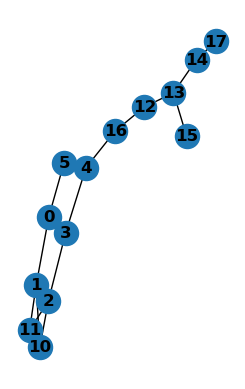

In [25]:
G = nx.Graph()

nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [0, 3, 4, 5])
# add clique
G.add_node(10)
G.add_edges_from([(1, 10), (2, 10)])
# add high order clique
G.add_node(11)
G.add_edges_from([(1, 11), (2, 11), (11, 10)])
# add line path
G.add_node(16)
G.add_node(12)
G.add_node(13)
G.add_node(14)
G.add_node(15)
G.add_node(17)
G.add_edges_from([(16, 4), (12, 13), (13, 14), (12, 16), (13, 15), (14, 17)])


subax3 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

cycle_b = nx.cycle_basis(G, 0)
#print(cycle_b)                                 # basic cycles
#print(sorted(nx.simple_cycles(G)))            # all cycles
max_cliques = sorted([clique for clique in nx.find_cliques(G) if len(clique)>2])  # only maximal cliques, filter the length 2 clique
reduced_cycle_b = [cy for cy in cycle_b for cl in max_cliques if not set(cy).issubset(cl)]

print("max_clieques ", max_cliques)
print("cycle_basis ", cycle_b)
print("reduced_clycle_basis ", reduced_cycle_b)

In [26]:
[[x] for chain in list(nx.chain_decomposition(G)) for (x, s) in chain]

[[0], [3], [2], [1], [0], [5], [4], [1], [10], [1], [11], [2]]

In [27]:
list(nx.chain_decomposition(G))

[[(0, 3), (3, 2), (2, 1), (1, 0)],
 [(0, 5), (5, 4), (4, 3)],
 [(1, 10), (10, 2)],
 [(1, 11), (11, 10)],
 [(2, 11)]]

In [28]:
[[{s, d} for (s, d) in chain] for chain in list(nx.chain_decomposition(G))]

[[{0, 3}, {2, 3}, {1, 2}, {0, 1}],
 [{0, 5}, {4, 5}, {3, 4}],
 [{1, 10}, {2, 10}],
 [{1, 11}, {10, 11}],
 [{2, 11}]]

In [29]:
nx.triangles(G)

{0: 0,
 1: 3,
 2: 3,
 3: 0,
 4: 0,
 5: 0,
 10: 3,
 11: 3,
 16: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 17: 0}

In [30]:
list(nx.community.k_clique_communities(G, 4))

[frozenset({1, 2, 10, 11})]

In [31]:
list(nx.all_node_cuts(G))

[{4}, {16}, {12}, {13}, {14}]

In [32]:
sorted(map(sorted, nx.k_edge_subgraphs(G, k=2)))

[[0, 1, 2, 3, 4, 5, 10, 11], [12], [13], [14], [15], [16], [17]]

In [33]:
[comp for comp in sorted(map(sorted, nx.k_edge_components(G, k=2))) if len(comp) > 2]


[[0, 1, 2, 3, 4, 5, 10, 11]]

max_clieques  [[1, 10, 2, 11]]
cycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0], [1, 11, 2], [10, 11, 2], [1, 10, 2]]
reduced_clycle_basis  [[3, 4, 5, 0], [1, 2, 3, 0]]


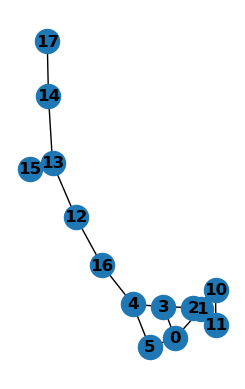

In [38]:

G = nx.Graph()

nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [0, 3, 4, 5])
# add clique
G.add_node(10)
G.add_edges_from([(1, 10), (2, 10)])
# add high order clique
G.add_node(11)
G.add_edges_from([(1, 11), (2, 11), (11, 10)])
# add line path
G.add_node(16)
G.add_node(12)
G.add_node(13)
G.add_node(14)
G.add_node(15)
G.add_node(17)
G.add_edges_from([(16, 4), (12, 13), (13, 14), (12, 16), (13, 15), (14, 17)])


subax3 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

cycle_b = nx.cycle_basis(G, 0)
#print(cycle_b)                                 # basic cycles
#print(sorted(nx.simple_cycles(G)))            # all cycles
max_cliques = sorted([clique for clique in nx.find_cliques(G) if len(clique)>2])  # only maximal cliques, filter the length 2 clique
reduced_cycle_b = [cy for cy in cycle_b for cl in max_cliques if not set(cy).issubset(cl)]

print("max_clieques ", max_cliques)
print("cycle_basis ", cycle_b)
print("reduced_clycle_basis ", reduced_cycle_b)


In [35]:
def star_rec(node, visited, layer):
    if layer == 0:
        return
    visited.add(node)
    for neighbors in list(nx.neighbors(G, node)):
        star_rec(neighbors, visited, layer-1)
    return list(visited)

stars = []
for node in nx.nodes(G):
    stars.append(star_rec(node, set(), 2))

stars

[[0, 1, 3, 5],
 [0, 1, 2, 10, 11],
 [1, 2, 3, 10, 11],
 [0, 2, 3, 4],
 [16, 3, 4, 5],
 [0, 4, 5],
 [11, 1, 10, 2],
 [10, 1, 2, 11],
 [16, 4, 12],
 [16, 12, 13],
 [12, 13, 14, 15],
 [17, 13, 14],
 [13, 15],
 [17, 14]]

In [47]:
def supernode_edges(supernode, concepts):
    return [(supernode, n) for n in concepts]

In [48]:
concept = [0, 1, 2, 10, 11]

In [49]:
supernode_edges("C1", concept)

[('C1', 0), ('C1', 1), ('C1', 2), ('C1', 10), ('C1', 11)]

In [50]:
G.add_node("C1")
G.add_edges_from(supernode_edges("C1", concept))


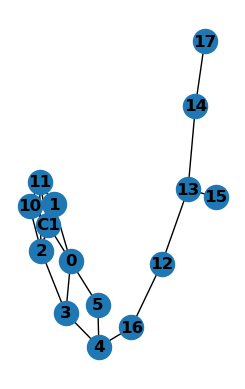

In [51]:
subax3 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
